# Data Analysis of e-commerce Website

Description: This dataset is contains gogle analytics data from Jan 1, 2017 to Jul 31, 2021.Information is provided below to understad the columns.


#### Fields
* FullVisitorId: The unique visitor ID
* VisitNumber: The session(visit) number for this user. If this is the first session, then this is set to 1.
* Date: The date of the session in YYYYMMDD format.
* VisitStartTime: The timestamp (expressed as POSIX time)
* totals_bounces: Total bounces (for convenience). For a bounced session, the value is 1, otherwise it is null
* totals_pageviews: Total number of pageviews within the session.
* totals_timeOnSite: Total time of the session expressed in seconds.
* totals_totalTransactionRevenue: Total transaction revenue, expressed as the value passed to Analytics 
multiplied by 10^6 (e.g., 2.40 would be given as 2400000)
* totals_transactions: Total number of ecommerce transactions within the session
* trafficSource_source: The source of the traffic source. Could be the name of the search engine, the referring 
hostname, or a value of the utm_source URL parameter
* trafficSource_medium: The medium of the traffic source. Could be "organic", "cpc", "referral", or the value of 
the utm_medium URL parameter.
* trafficSource_campaign: The campaign value. Usually set by the utm_campaign URL parameter
* device_deviceCategory: The type of device (Mobile, Tablet, Desktop).
* device_operatingSystem: The operating system of the device (e.g., "Macintosh" or "Windows").device_mobileDeviceModel: The mobile device model.
* geoNetwork_city: Users' city, derived from their IP addresses or Geographical IDs.
* ChannelGrouping: The Default Channel Group associated with an end user's session for this Vie

#### Problem Statement:
* Build a Decision tree Prediction Model to predict if new visitor will transact or not.

In [2]:
#import the required libraries

import pandas as pd
import numpy as np


import matplotlib 
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot, download_plotlyjs
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from datetime import datetime
pd.to_datetime('today')


import warnings
warnings.filterwarnings('ignore')

In [3]:
#import the dataset
data = pd.read_csv('C:/Users/playo/Desktop/Simplilearn DATA SCIENCE/New folder/sample_user_data.csv')

In [4]:
#Lets see the first 10 rows with head function
data.head(10)

fullVisitorId  VisitNumber      Date  VisitStartTime  bounces  pageviews  \
0   7.850000e+17            1  20170427      1493331229      1.0        1.0   
1   1.420000e+17            1  20170427      1493316667      1.0        1.0   
2   1.020000e+18            1  20170427      1493295075      1.0        1.0   
3   7.450000e+18            1  20170427      1493299324      1.0        1.0   
4   1.990000e+18            3  20170427      1493309497      1.0        1.0   
5   5.900000e+18            1  20170427      1493343382      1.0        1.0   
6   7.280000e+18            1  20170427      1493311065      1.0        1.0   
7   8.770000e+17            1  20170427      1493326789      1.0        1.0   
8   2.460000e+18            3  20170427      1493362614      1.0        1.0   
9   9.750000e+18            1  20170427      1493284841      1.0        1.0   

   timeOnSite  totalTransactionRevenue  transactions  source   medium  \
0         NaN                      NaN           NaN  google  organic   
1         NaN                      NaN           NaN  google  organic   
2         NaN                      NaN           NaN  google  organic   
3         NaN                      NaN           NaN  google  organic   
4         NaN                      NaN           NaN  google  organic   
5         NaN                      NaN           NaN  google  organic   
6         NaN                      NaN           NaN  google  organic   
7         NaN                      NaN           NaN  google  organic   
8         NaN                      NaN           NaN  google  organic   
9         NaN                      NaN           NaN  google  organic   

    campaign deviceCategory operatingSystem              mobileDeviceModel  \
0  (not set)        desktop       Macintosh  not available in demo dataset   
1  (not set)        desktop       Macintosh  not available in demo dataset   
2  (not set)        desktop         Windows  not available in demo dataset   
3  (not set)        desktop         Windows  not available in demo dataset   
4  (not set)        desktop         Windows  not available in demo dataset   
5  (not set)        desktop         Windows  not available in demo dataset   
6  (not set)        desktop         Windows  not available in demo dataset   
7  (not set)        desktop       Macintosh  not available in demo dataset   
8  (not set)        desktop         Windows  not available in demo dataset   
9  (not set)        desktop       Chrome OS  not available in demo dataset   

                            city ChannelGrouping  
0                  Mountain View  Organic Search  
1  not available in demo dataset  Organic Search  
2  not available in demo dataset  Organic Search  
3  not available in demo dataset  Organic Search  
4  not available in demo dataset  Organic Search  
5                      Melbourne  Organic Search  
6  not available in demo dataset  Organic Search  
7                  San Francisco  Organic Search  
8                         Dallas  Organic Search  
9                          Paris  Organic Search

In [5]:
data.shape

(464439, 17)

### Cleaning and Data Preperation

![](https://media2.giphy.com/media/l3giLj8coa2HVnzgeF/200w.webp?cid=ecf05e47xnbsoifwwqtd4prnmffux4dn9sqchxcl2q96i0au&rid=200w.webp)

In [6]:
#let's Take a look at all the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464439 entries, 0 to 464438
Data columns (total 17 columns):
fullVisitorId              464439 non-null float64
VisitNumber                464439 non-null int64
Date                       464439 non-null int64
VisitStartTime             464439 non-null int64
bounces                    232178 non-null float64
pageviews                  464387 non-null float64
timeOnSite                 231612 non-null float64
totalTransactionRevenue    6308 non-null float64
transactions               6308 non-null float64
source                     464439 non-null object
medium                     464439 non-null object
campaign                   464439 non-null object
deviceCategory             464439 non-null object
operatingSystem            464439 non-null object
mobileDeviceModel          464439 non-null object
city                       464439 non-null object
ChannelGrouping            464439 non-null object
dtypes: float64(6), int64(3), object(8)


In [7]:
#finding missing values in dataset
data.isna().sum()

fullVisitorId                   0
VisitNumber                     0
Date                            0
VisitStartTime                  0
bounces                    232261
pageviews                      52
timeOnSite                 232827
totalTransactionRevenue    458131
transactions               458131
source                          0
medium                          0
campaign                        0
deviceCategory                  0
operatingSystem                 0
mobileDeviceModel               0
city                            0
ChannelGrouping                 0
dtype: int64

* As we Can See that there 3-4 columns who have so many missing values. 
* bounces
* pageviews
* timeOnSite
* totalTransactionRevenue
* transactions 

In [8]:
#Treating the Missing Values.
data['bounces'].fillna(0, inplace=True)

data['pageviews'].fillna(0, inplace=True)

data['timeOnSite'].fillna(0, inplace=True)

In [9]:
data['Date']=pd.to_datetime(data['Date'])

In [10]:
#Treat the visitStartTime as they have some unusual data

data['VisitStartTime']=pd.to_datetime(data['VisitStartTime'],unit='s')

In [11]:
#we've to extract y,m,d,h,min from VisitStartTime

data['year'] = data['VisitStartTime'].dt.year
data['month'] = data['VisitStartTime'].dt.month
data['day'] = data['VisitStartTime'].dt.day
data['hour'] = data['VisitStartTime'].dt.hour
data['minute'] = data['VisitStartTime'].dt.minute

In [12]:
#drop some columns which are not required like: visitorid,mobileDeviceModel,and Date

data = data.drop(['fullVisitorId','mobileDeviceModel'], axis=1)

In [13]:
#lets look into data
data.head()

VisitNumber                          Date      VisitStartTime  bounces  \
0            1 1970-01-01 00:00:00.020170427 2017-04-27 22:13:49      1.0   
1            1 1970-01-01 00:00:00.020170427 2017-04-27 18:11:07      1.0   
2            1 1970-01-01 00:00:00.020170427 2017-04-27 12:11:15      1.0   
3            1 1970-01-01 00:00:00.020170427 2017-04-27 13:22:04      1.0   
4            3 1970-01-01 00:00:00.020170427 2017-04-27 16:11:37      1.0   

   pageviews  timeOnSite  totalTransactionRevenue  transactions  source  \
0        1.0         0.0                      NaN           NaN  google   
1        1.0         0.0                      NaN           NaN  google   
2        1.0         0.0                      NaN           NaN  google   
3        1.0         0.0                      NaN           NaN  google   
4        1.0         0.0                      NaN           NaN  google   

    medium   campaign deviceCategory operatingSystem  \
0  organic  (not set)        desktop       Macintosh   
1  organic  (not set)        desktop       Macintosh   
2  organic  (not set)        desktop         Windows   
3  organic  (not set)        desktop         Windows   
4  organic  (not set)        desktop         Windows   

                            city ChannelGrouping  year  month  day  hour  \
0                  Mountain View  Organic Search  2017      4   27    22   
1  not available in demo dataset  Organic Search  2017      4   27    18   
2  not available in demo dataset  Organic Search  2017      4   27    12   
3  not available in demo dataset  Organic Search  2017      4   27    13   
4  not available in demo dataset  Organic Search  2017      4   27    16   

   minute  
0      13  
1      11  
2      11  
3      22  
4      11

In [14]:
data.describe()

VisitNumber        bounces      pageviews     timeOnSite  \
count  464439.000000  464439.000000  464439.000000  464439.000000   
mean        2.334040       0.499911       3.771589     139.594659   
std         9.879354       0.500001       6.403345     374.763296   
min         1.000000       0.000000       0.000000       0.000000   
25%         1.000000       0.000000       1.000000       0.000000   
50%         1.000000       0.000000       1.000000       0.000000   
75%         1.000000       1.000000       4.000000      94.000000   
max       395.000000       1.000000     466.000000   12136.000000   

       totalTransactionRevenue  transactions      year          month  \
count             6.308000e+03   6308.000000  464439.0  464439.000000   
mean              1.617053e+08      1.046449    2017.0       4.051736   
std               9.034953e+08      0.531457       0.0       2.006265   
min               2.200000e+06      1.000000    2017.0       1.000000   
25%               2.899000e+07      1.000000    2017.0       2.000000   
50%               5.297500e+07      1.000000    2017.0       4.000000   
75%               1.119375e+08      1.000000    2017.0       6.000000   
max               4.708206e+10     25.000000    2017.0       8.000000   

                 day           hour         minute  
count  464439.000000  464439.000000  464439.000000  
mean       15.756078      12.663982      29.541287  
std         8.798566       6.852292      17.282520  
min         1.000000       0.000000       0.000000  
25%         8.000000       7.000000      15.000000  
50%        16.000000      14.000000      30.000000  
75%        23.000000      18.000000      45.000000  
max        31.000000      23.000000      59.000000

* the Two column totalTransationRevenue and transations we didn't dropped because they are dependent on each other as they have exact same amount of missing values.

In [15]:
#lets fill the Missing values of these Columns
data['totalTransactionRevenue'].fillna(0,inplace=True)
data['transactions'].fillna(0,inplace=True)

In [16]:
# target variable 'transaction', 1 = transaction, 0 = no transaction.
data['transactions'] = np.where(data['transactions']  == 0, '0', '1')
data['transactions'] = data['transactions'].astype('str')

In [17]:
#Total transaction revenue, expressed as the value passed to Analytics multiplied by 10^6
data['totalTransactionRevenue'] = data['totalTransactionRevenue']/1000000

In [18]:
#lets Deal with the city columns:
data['city'].value_counts()

not available in demo dataset    268179
Mountain View                     21560
(not set)                         16313
New York                          14582
San Francisco                     11455
Sunnyvale                          7588
London                             7552
San Jose                           5744
Los Angeles                        5246
Chicago                            4080
Bengaluru                          3138
Sydney                             2925
Chennai                            2864
Toronto                            2770
Seattle                            2748
Dublin                             2720
Paris                              2567
Mumbai                             2338
Hyderabad                          2069
Austin                             2007
Santa Clara                        1869
Hong Kong                          1836
Singapore                          1788
Bangkok                            1728
Warsaw                             1723


In [19]:
# Replace the "not available in demo dataset" and "(not set)" by "Unavailable" from city Column.
data['city'].replace('not available in demo dataset', 'Unavailable', inplace=True)
data['city'].replace('(not set)', 'Unavailable', inplace=True)

In [20]:
#dropping some more columns, so that dataset can be short.
data= data.drop(['year','totalTransactionRevenue'],axis=1)

In [21]:
data= data.drop(['Date'],axis=1)

In [22]:
data.head(10)

VisitNumber      VisitStartTime  bounces  pageviews  timeOnSite  \
0            1 2017-04-27 22:13:49      1.0        1.0         0.0   
1            1 2017-04-27 18:11:07      1.0        1.0         0.0   
2            1 2017-04-27 12:11:15      1.0        1.0         0.0   
3            1 2017-04-27 13:22:04      1.0        1.0         0.0   
4            3 2017-04-27 16:11:37      1.0        1.0         0.0   
5            1 2017-04-28 01:36:22      1.0        1.0         0.0   
6            1 2017-04-27 16:37:45      1.0        1.0         0.0   
7            1 2017-04-27 20:59:49      1.0        1.0         0.0   
8            3 2017-04-28 06:56:54      1.0        1.0         0.0   
9            1 2017-04-27 09:20:41      1.0        1.0         0.0   

  transactions  source   medium   campaign deviceCategory operatingSystem  \
0            0  google  organic  (not set)        desktop       Macintosh   
1            0  google  organic  (not set)        desktop       Macintosh   
2            0  google  organic  (not set)        desktop         Windows   
3            0  google  organic  (not set)        desktop         Windows   
4            0  google  organic  (not set)        desktop         Windows   
5            0  google  organic  (not set)        desktop         Windows   
6            0  google  organic  (not set)        desktop         Windows   
7            0  google  organic  (not set)        desktop       Macintosh   
8            0  google  organic  (not set)        desktop         Windows   
9            0  google  organic  (not set)        desktop       Chrome OS   

            city ChannelGrouping  month  day  hour  minute  
0  Mountain View  Organic Search      4   27    22      13  
1    Unavailable  Organic Search      4   27    18      11  
2    Unavailable  Organic Search      4   27    12      11  
3    Unavailable  Organic Search      4   27    13      22  
4    Unavailable  Organic Search      4   27    16      11  
5      Melbourne  Organic Search      4   28     1      36  
6    Unavailable  Organic Search      4   27    16      37  
7  San Francisco  Organic Search      4   27    20      59  
8         Dallas  Organic Search      4   28     6      56  
9          Paris  Organic Search      4   27     9      20

## Data Visualisation 

* Here We are going to Visualise Our Dataset so that it can easily read.

* pageviews vs bounces
* operatingSystem
* Channel Users Used to Visit


In [23]:
#pageview vs bounces by months starting from ( Jan 1 2017to July 30 2017)

data['pageviews'] = data['pageviews'].fillna(0).astype('int32')
data['bounces'] = data['bounces'].fillna(0).astype('int32')

pageview = data.groupby('month')['pageviews'].apply(lambda x:x[x >= 1].count()).reset_index()
bounce = data.groupby('month')['bounces'].apply(lambda x:x[x >= 1].count()).reset_index()

pageviews = go.Scatter(x = pageview['month'],y= pageview['pageviews'], name = 'Pageview',marker=dict(color = "blue"))


bounces = go.Scatter(x = bounce['month'],y= bounce['bounces'],name = 'Bounce',marker=dict(color = "red"))

py.iplot([pageviews,bounces])

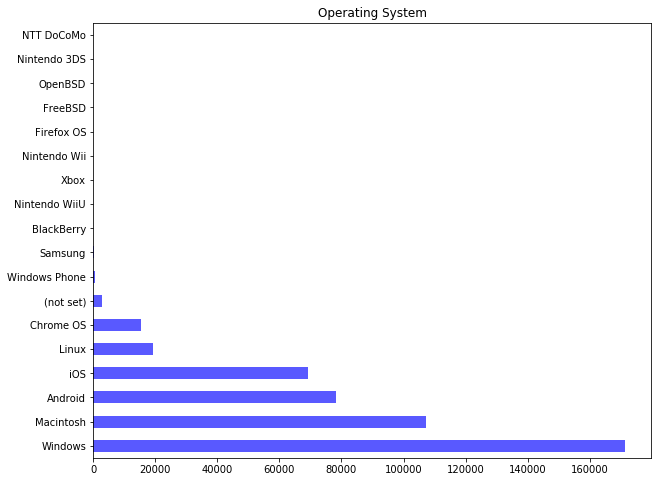

In [24]:
# explore data for operatingSystem
plt.figure(figsize=(10,8))
data.operatingSystem.value_counts().plot(kind='barh',color='b',alpha=.65)
plt.title("Operating System")
plt.show()

In [25]:
#Channel Used to Visit

temp = data['ChannelGrouping'].value_counts()
chart = [go.Pie(labels = temp.index, values = temp.values)]
py.iplot(chart)

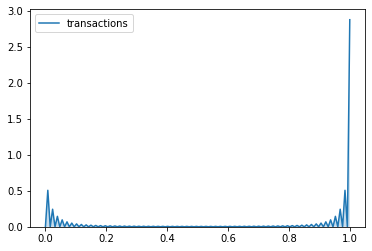

In [26]:
sns.kdeplot(data['transactions'], shade=True)

             VisitNumber   bounces  pageviews  timeOnSite     month       day  \
VisitNumber     1.000000 -0.018556   0.045355    0.060161 -0.009267 -0.003420   
bounces        -0.018556  1.000000  -0.432758   -0.372421  0.003535 -0.004278   
pageviews       0.045355 -0.432758   1.000000    0.687048 -0.006726  0.001906   
timeOnSite      0.060161 -0.372421   0.687048    1.000000  0.010675  0.006760   
month          -0.009267  0.003535  -0.006726    0.010675  1.000000 -0.002294   
day            -0.003420 -0.004278   0.001906    0.006760 -0.002294  1.000000   
hour            0.024103 -0.024715   0.010522    0.005231 -0.021395 -0.001957   
minute         -0.000838 -0.000539  -0.002178   -0.005169 -0.001867  0.000436   

                 hour    minute  
VisitNumber  0.024103 -0.000838  
bounces     -0.024715 -0.000539  
pageviews    0.010522 -0.002178  
timeOnSite   0.005231 -0.005169  
month       -0.021395 -0.001867  
day         -0.001957  0.000436  
hour         1.000000 -0.003989 

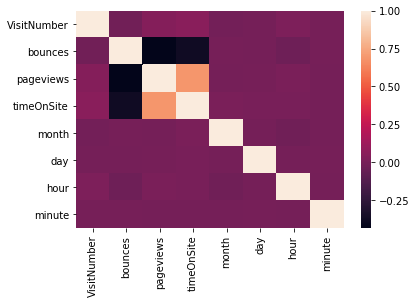

In [27]:
corr = data.corr()
print(corr)
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [28]:
data.head()

VisitNumber      VisitStartTime  bounces  pageviews  timeOnSite  \
0            1 2017-04-27 22:13:49        1          1         0.0   
1            1 2017-04-27 18:11:07        1          1         0.0   
2            1 2017-04-27 12:11:15        1          1         0.0   
3            1 2017-04-27 13:22:04        1          1         0.0   
4            3 2017-04-27 16:11:37        1          1         0.0   

  transactions  source   medium   campaign deviceCategory operatingSystem  \
0            0  google  organic  (not set)        desktop       Macintosh   
1            0  google  organic  (not set)        desktop       Macintosh   
2            0  google  organic  (not set)        desktop         Windows   
3            0  google  organic  (not set)        desktop         Windows   
4            0  google  organic  (not set)        desktop         Windows   

            city ChannelGrouping  month  day  hour  minute  
0  Mountain View  Organic Search      4   27    22      13  
1    Unavailable  Organic Search      4   27    18      11  
2    Unavailable  Organic Search      4   27    12      11  
3    Unavailable  Organic Search      4   27    13      22  
4    Unavailable  Organic Search      4   27    16      11

#  Predictive Modelling

   * Here We will convert, train split, the model with Decision Tree and RandomForest to check which is more accurate.

In [29]:
#making list of categorical Variables

category_variables =["ChannelGrouping", "city", "operatingSystem", 
        "campaign", "medium", "source"]

for category in category_variables:
    data[category]=pd.get_dummies(data[category])

In [30]:
features = ['VisitNumber', 'bounces', 'pageviews', 'timeOnSite', 'source',
            'medium', 'campaign', 'operatingSystem', 'city',
            'ChannelGrouping', 'month', 'day', 'hour',]

# Features
X = data[features] 

# Target variable
y = data.transactions

In [31]:
#split the data into training set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [32]:
from sklearn.tree import DecisionTreeClassifier
print(X_train.shape)

(371551, 13)


In [33]:
#Decision Tree Classifier Object
classifier = DecisionTreeClassifier()

classifier = classifier.fit(X_train,y_train)

In [34]:
##Predict for test dataset
y_predict = classifier.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
#check the accurary of our model
accuracy = accuracy_score(y_predict,y_test)

In [37]:
print(accuracy)

0.980180432348635


In [38]:
#lets Check it with Random Forest for better accuracy

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()

In [39]:
classifier.fit(X_train,y_train)
y_predict = classifier.predict(X_test)


In [40]:
accuracy = accuracy_score(y_predict,y_test) 

In [41]:
print(accuracy)

0.9854771337524761


In [42]:
print(confusion_matrix(y_test,y_predict))

[[91348   274]
 [ 1075   191]]


In [44]:
#importing the classification report
from sklearn.metrics import classification_report

In [45]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     91622
           1       0.41      0.15      0.22      1266

    accuracy                           0.99     92888
   macro avg       0.70      0.57      0.61     92888
weighted avg       0.98      0.99      0.98     92888



### Prediction of the Model

##### So Accuracy of our Decision Tree Model is 97% and with RandomForestClassifier it seems more accurate which is 98%.





<img src = "https://media.giphy.com/media/26gsjCZpPolPr3sBy/giphy.gif"/>

 * References
 * Numpy Documentation:https://numpy.org/devdocs/user/quickstart.html
 * Matplotlib gallery: https://matplotlib.org/3.1.1/gallery/index.html
 * plotly tutorials :https://youtu.be/GGL6U0k8WYA
 * DecisionTree & Random Forest Model: https://www.kaggle.com/startupsci/titanic-data-science-solutions
 